In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() #targets are 2D (N x 1 instead of N)
print("x_train sahpe:", x_train.shape)
print("y_train sahpe:", y_train.shape)

170498071/170498071 [==============================] - 6s 0us/step
x_train sahpe: (50000, 32, 32, 3)
y_train sahpe: (50000,)


In [3]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
# Build the model with Keras Functional API
i = Input(shape = x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i) 
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x) 
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.5)(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.5)(x)
x = Conv2D(128, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.5)(x)

# GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [5]:
# compile
# use GPU for this

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 27s 12ms/step - loss: 1.4099 - accuracy: 0.5338 - val_loss: 1.3605 - val_accuracy: 0.5366
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9034 - accuracy: 0.6865 - val_loss: 0.9687 - val_accuracy: 0.6563
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7332 - accuracy: 0.7497 - val_loss: 0.7776 - val_accuracy: 0.7350
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5999 - accuracy: 0.7942 - val_loss: 0.8892 - val_accuracy: 0.7225
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4868 - accuracy: 0.8323 - val_loss: 0.7074 - val_accuracy: 0.7764
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3834 - accuracy: 0.8687 - val_loss: 0.7592 - val_accuracy: 0.7696
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3113 - accuracy: 0.8930 - val_loss: 0.7755 -

In [17]:
# fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range = 0.1,
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch = steps_per_epoch, epochs=15)

Epoch 1/15
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2191 - accuracy: 0.9278 - val_loss: 0.5164 - val_accuracy: 0.8573
Epoch 2/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2124 - accuracy: 0.9283 - val_loss: 0.4955 - val_accuracy: 0.8672
Epoch 3/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2106 - accuracy: 0.9291 - val_loss: 0.4654 - val_accuracy: 0.8746
Epoch 4/15
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2020 - accuracy: 0.9335 - val_loss: 0.4531 - val_accuracy: 0.8665
Epoch 5/15
1562/1562 [==============================] - 35s 22ms/step - loss: 0.1945 - accuracy: 0.9344 - val_loss: 0.4990 - val_accuracy: 0.8632
Epoch 6/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2002 - accuracy: 0.9330 - val_loss: 0.4880 - val_accuracy: 0.8762
Epoch 7/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.1967 - accuracy: 0.9339 - val_loss: 0.4719 -

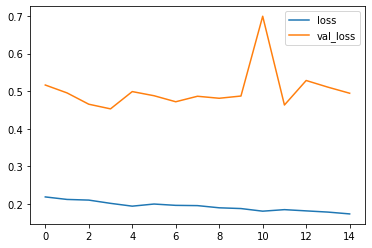

In [18]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

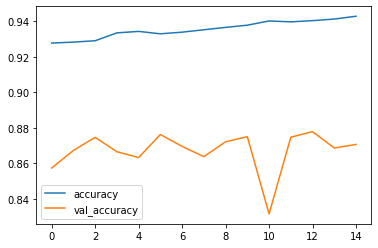

In [19]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion confusion matrix, w/o normalization
[[886  10  17  15   5   8   5   4  20  30]
 [  6 942   0   2   0   0   1   0   8  41]
 [ 41   3 748  47  39  49  46  12   4  11]
 [ 15   6  22 709  29 156  37  14   2  10]
 [  7   2  23  34 842  32  37  18   4   1]
 [  5   3  10  70  18 866   9  15   1   3]
 [  4   2  12  23   8  19 926   1   2   3]
 [  7   1   9  14  21  25   5 913   1   4]
 [ 32  14   1   6   1   1   4   2 916  23]
 [  4  24   0   4   0   0   1   2   7 958]]


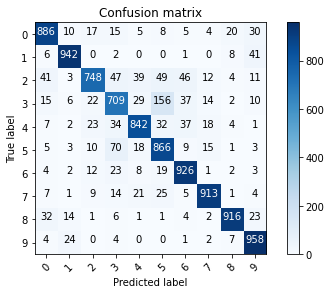

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion confusion matrix, w/o normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [21]:
# labels
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

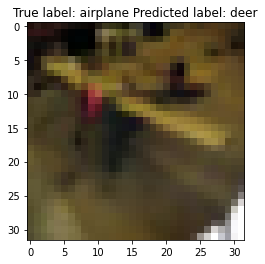

In [22]:
# show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3), cmap = 'gray')
plt.title("True label: %s Predicted label: %s" % (labels[y_test[i]],labels[p_test[i]]));

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0     